In [ ]:
#K-means clustering model in Python

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
cd'/content/gdrive/MyDrive/Colab Notebooks/CSV Files'

/content/gdrive/MyDrive/Colab Notebooks/CSV Files


In [ ]:
#Dataset : The dataset contains customer data, like gender, age, profession, size of family, etc. Our plan is to create clusters out of these customers.
import pandas as pd
df = pd.read_csv("Test.csv")
df.sample(5, random_state=44)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
395,460284,Female,No,29,Yes,Entertainment,9.0,Low,2.0,Cat_6
1495,464032,Male,No,21,No,Healthcare,1.0,Low,3.0,Cat_6
2056,466019,Female,Yes,63,Yes,Artist,5.0,Low,1.0,Cat_3
1578,464339,Male,No,27,No,Artist,1.0,Low,2.0,Cat_6
208,459617,Male,No,28,Yes,Entertainment,1.0,Low,5.0,Cat_6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [ ]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2154 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2154 non-null   int64  
 1   Gender           2154 non-null   object 
 2   Ever_Married     2154 non-null   object 
 3   Age              2154 non-null   int64  
 4   Graduated        2154 non-null   object 
 5   Profession       2154 non-null   object 
 6   Work_Experience  2154 non-null   float64
 7   Spending_Score   2154 non-null   object 
 8   Family_Size      2154 non-null   float64
 9   Var_1            2154 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 185.1+ KB


In [ ]:
#reset index
df = df.reset_index()
df = df.drop("index", axis="columns")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
3,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4
4,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6


In [ ]:
df.info()

In [ ]:
#Formatting the data for the K-means clustering model(convert categorical values to numerical data)
df_new = pd.get_dummies(df)
df_new.head()

,ID,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,...,Spending_Score_Average,Spending_Score_High,Spending_Score_Low,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,458989,36,0.0,1.0,1,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
1,458994,37,8.0,4.0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,459000,59,11.0,2.0,0,1,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
3,459003,47,0.0,5.0,0,1,0,1,0,1,...,0,1,0,0,0,0,1,0,0,0
4,459005,61,5.0,3.0,0,1,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_kmeans = pd.get_dummies(df, drop_first=True)
df_kmeans.head()

,ID,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,Profession_Entertainment,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,458989,36,0.0,1.0,0,1,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,458994,37,8.0,4.0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,459000,59,11.0,2.0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,459003,47,0.0,5.0,1,1,1,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,459005,61,5.0,3.0,1,1,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
#Creating the K-means clustering model
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
clusters = kmeans_model.fit_predict(df_kmeans)
df_kmeans.insert(df_kmeans.columns.get_loc("Age"), "Cluster",clusters)
df_kmeans.head(3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,ID,Cluster,Age,Work_Experience,Family_Size,Gender_Male,Ever_Married_Yes,Graduated_Yes,Profession_Doctor,Profession_Engineer,...,Profession_Lawyer,Profession_Marketing,Spending_Score_High,Spending_Score_Low,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,458989,0,36,0.0,1.0,0,1,1,0,1,...,0,0,0,1,0,0,0,0,1,0
1,458994,0,37,8.0,4.0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,459000,0,59,11.0,2.0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_kmeans.Cluster.unique()

array([0, 2, 1], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

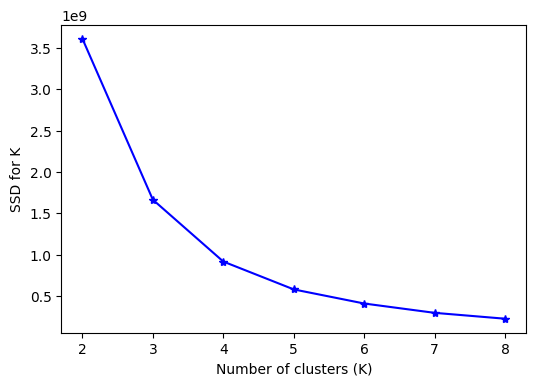

In [ ]:
#Finding the ideal number of clusters with the elbow method
#SSD=sum of squared distances; Is the result of calculating in each cluster;how far the data points are from the cluster centroid
#Note:as the number of clusters increase, the SSD decreases
ssd=[]
for k in range(2, 9):
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(df_kmeans)
    ssd.append(kmeans_model.inertia_)
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4), dpi=100)
plt.plot(range(2, 9), ssd, color="blue", marker="*" )
plt.xlabel("Number of clusters (K)")
plt.ylabel("SSD for K")
plt.show()

In [ ]:
#in case of k=3;SSD is not significantly reduced, so there’s no need to add more clusters
#The solution here is 3; after it, there seem to be no more sudden drops, so the ideal number for this dataset would be 3.


In [ ]:
from sklearn.decomposition import PCA
#Principal Component Analysis (PCA) is an unsupervised learning approach of the feature data by changing the dimensions and reducing the variables in a dataset.
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

In [ ]:
pca = PCA(2)
df = pca.fit_transform(df_kmeans)
df.shape

(2154, 2)

In [ ]:
#Import KMeans module
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters= 3)

#predict the labels of clusters.
label = kmeans.fit_predict(df)
print(label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[1 1 1 ... 2 2 2]


In [ ]:
#Getting unique labels
a=np.unique(label)

In [ ]:
#plotting the results:

centroids = kmeans.cluster_centers_   ##Getting the Centroids
for i in a:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
    plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()